Supervised: classification tasks and regression tasks

Unsupervised learning: clustering and dimensionality reduction
* principal component analysis (PCA)
* 

Semi-supervised learning??

# Qualitative Examples of Machine Learning Applications

# Data Representation in Scikit-Learn

In [2]:
# data as  table:
import seaborn as sns
iris = sns.load_dataset('iris') 
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# X = [n_samples, n_features]
# X - numpy, df, SciPy sparse matrices

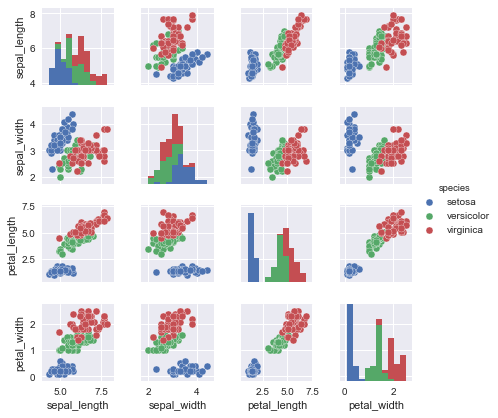

In [4]:
%matplotlib inline
import seaborn as sns; 
sns.set() 
sns.pairplot(iris, hue='species', size=1.5);

In [5]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

# Scikit-Learn’s Estimator API

The Scikit-Learn API is designed with the following guiding principles in mind, as outlined in the Scikit-Learn API paper:
* Consistency -  все объекты имеют общий интерфейс
* Inspection - все параметры моделей public
* Limited object hierarchy - только модели представлены самостоятельными классами
* Composition - в смысле пайпланов
* Sensible defaults - оптимальные значения по умолчанию

## Supervised learning example: Simple linear regression

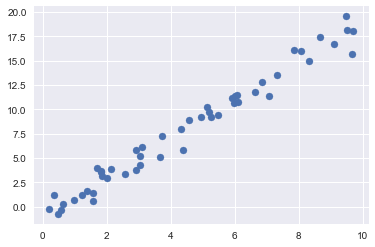

In [9]:
import matplotlib.pyplot as plt 
import numpy as np

rng = np.random.RandomState(42) 
x = 10 * rng.rand(50) 
y = 2 * x - 1 + rng.randn(50) 
plt.scatter(x, y);

In [10]:
# 1. Choose a class of model.
from sklearn.linear_model import LinearRegression

In [12]:
# 2. Choose model hyperparameters.
LinearRegression??

In [13]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
# 3. Arrange data into a features matrix and target vector.
X = x[:, np.newaxis]
X.shape

(50, 1)

In [15]:
# 4. Fit the model to your data.
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# в sklearn, параметры меняющиемся во время fit заканчиваются нижним подчеркиванием:
model.coef_, model.intercept_

(array([1.9776566]), -0.9033107255311164)

In [18]:
# эти два параметра отражают наклон прямой и смещиние
# и хорошо соотвествуют тому, что мы использовали в 2 * x - 1 + rng.randn(50) 

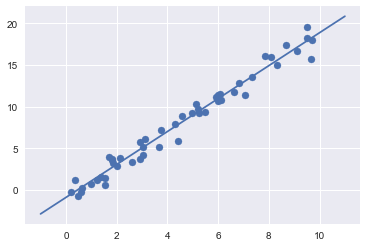

In [19]:
# 5. Predict labels for unknown data.
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

plt.scatter(x, y)
plt.plot(xfit, yfit);

## Supervised learning example: Iris classification

In [23]:
# Because it is so fast and has no hyperparameters to choose, 
# Gaussian naive Bayes is often a good model to use as a baseline classification
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [24]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [25]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.9736842105263158

## Unsupervised learning example: Iris dimensionality

In [33]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)
model.fit(X_iris)
X_2D = model.transform(X_iris)

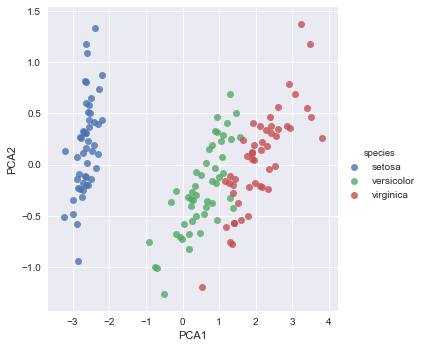

In [34]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In [35]:
# они не плохо разделились, несмотря на то, что мы не давали инфомацию о labels

## Unsupervised learning: Iris clustering

In [37]:
# Gaussian mixture model (GMM)

In [39]:
from sklearn.mixture import GaussianMixture

In [40]:
from sklearn.mixture import GMM # 1. Choose the model class 
model = GaussianMixture(n_components=3, covariance_type='full') 
model.fit(X_iris)
y_gmm = model.predict(X_iris)

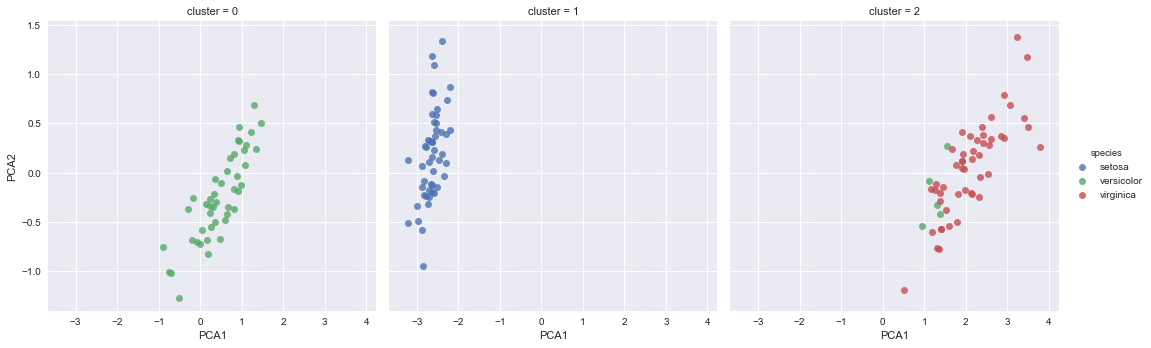

In [41]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

# Application: Exploring Handwritten Digits

In [43]:
# Loading and visualizing the digits data
from sklearn.datasets import load_digits 
digits = load_digits()
digits.images.shape

(1797, 8, 8)

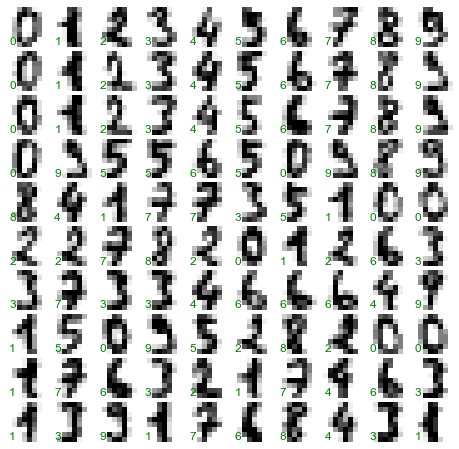

In [49]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(
    10, 10, 
    figsize=(8, 8), # установили размер каждой картинки
    subplot_kw={'xticks':[], 'yticks':[]}, # убрали тики на графиках
    gridspec_kw=dict(hspace=0.1, wspace=0.1) # немного их раздвинули
)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        digits.images[i], 
        cmap='binary', 
        interpolation='nearest')
    
    ax.text(
        0.05, 0.05, 
        str(digits.target[i]),
        transform=ax.transAxes, 
        color='green'
    )

In [50]:
X = digits.data
X.shape

(1797, 64)

In [51]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

In [54]:
# алгоритм Isomap
from sklearn.manifold import Isomap 
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

In [67]:
plt.cm.get_cmap('Spectral', 10)

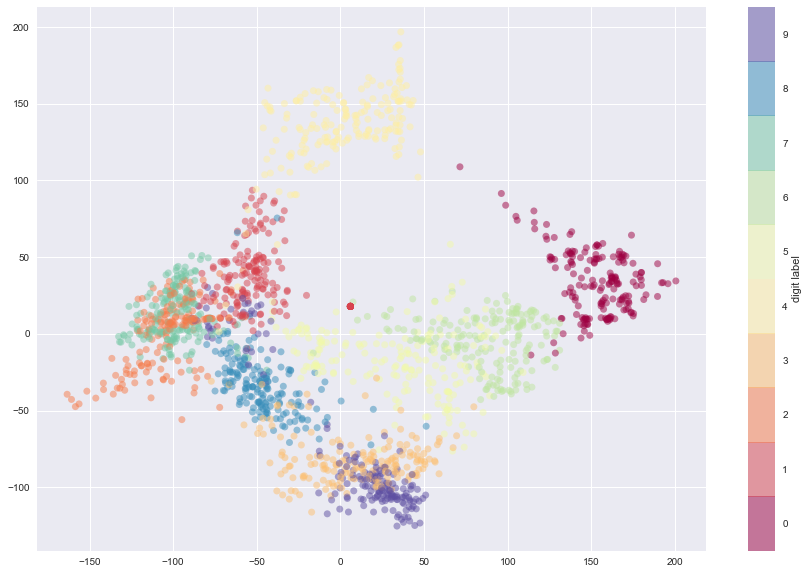

In [68]:
plt.rcParams['figure.figsize'] = 15, 10
plt.scatter(data_projected[:, 0], 
            data_projected[:, 1], 
            c=digits.target,
            edgecolor='none', 
            alpha=0.5, 
            cmap=plt.cm.get_cmap('Spectral', 10)
           )
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

In [69]:
# Classification on digits
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB 

model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [70]:
from sklearn.metrics import accuracy_score 
accuracy_score(ytest, y_model)

0.8333333333333334

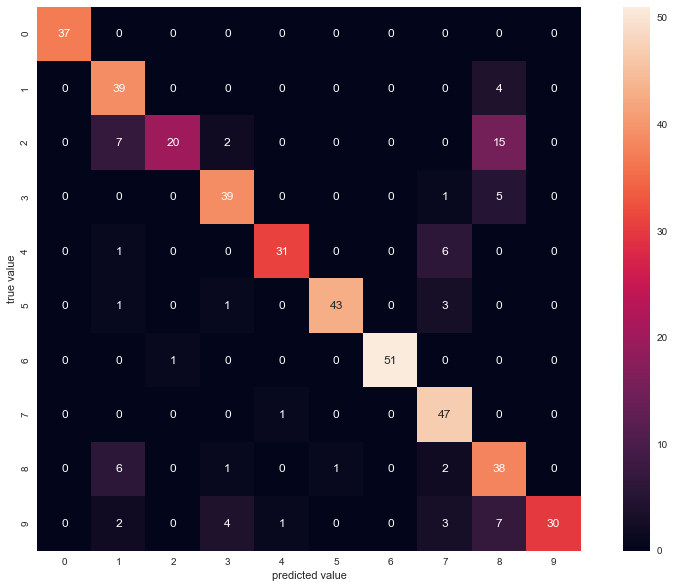

In [72]:
# посмотрим на ккииз цифрах мы ошибаемся
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=True, )
plt.xlabel('predicted value')
plt.ylabel('true value');

# тут классный способ сделать текст разного цвета

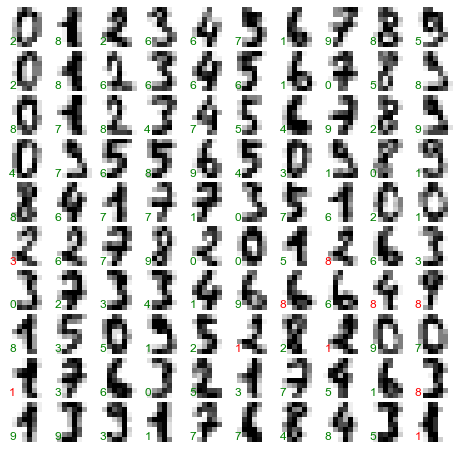

In [73]:
# нарусием с неправильными label красным цветом:
fig, axes = plt.subplots(
    10, 10, 
    figsize=(8, 8),
    subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(
        digits.images[i], 
        cmap='binary', 
        interpolation='nearest'
    ) 
    ax.text(0.05, 0.05, 
            str(y_model[i]), 
            transform=ax.transAxes, 
            color='green' if (ytest[i] == y_model[i]) else 'red'
    )

# Hyperparameters and Model Validation

## wrong way (типа без валидации)

In [77]:
from sklearn.datasets import load_iris 
iris = load_iris()

X = iris.data
y = iris.target

In [78]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
y_model = model.predict(X)

In [79]:
from sklearn.metrics import accuracy_score 
accuracy_score(y, y_model)

1.0

## Model validation the right way: Holdout sets

In [88]:
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, test_size=0.5)

# fit the model on one set of data
model.fit(X1, y1)

# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

## Кросс-валидация

In [91]:
from sklearn.cross_validation import cross_val_score 
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [92]:
X.shape

(150, 4)

In [95]:
# leave-one-out cross-validation
# мы берем и используем по одному значению для валидации, а на остальных обучаемся
# если в X 150 элеменов, то мы соответственно повоторим это 150 раз

In [93]:
from sklearn.cross_validation import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut(len(X))) 
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [94]:
scores.mean()

0.96

## Selecting the Best Model

что делать, если прогресса в обучении модели нет?
* использовать более сложную/гибкую модель
* использовать менее сложную/гибкую модель
* больше примеров
* больше фичей

Fundamentally, the question of “the best model” is about finding a sweet spot in the trade-off between bias and variance.

In [102]:
%%html
<img src="imgs/bias_vs_variance.png" width="1000px" align="left">

обе модели плохи по своему

у первой высокий bias (смещение)

у второй высокая дисперсия. Она переобучилась и подогнала полином под шум в данных

\begin{equation}
R^{2}
\end{equation}

https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D0%B4%D0%B5%D1%82%D0%B5%D1%80%D0%BC%D0%B8%D0%BD%D0%B0%D1%86%D0%B8%D0%B8

In [112]:
%%html
<img src="imgs/val_curve.png" width="1000px" align="left">

* The training score is everywhere higher than the validation score.
* For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
* For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.
* For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

### Validation curves in Scikit-Learn

# from sklearn.preprocessing import PolynomialFeatures  - добавляет полиномы в регрессию
# from sklearn.pipeline import make_pipeline

In [114]:
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LinearRegression 
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(
        PolynomialFeatures(degree), 
        LinearRegression(**kwargs)
    )

In [152]:
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed) 
    X = rng.rand(N, 1) ** 2 
    y = 10 - 1./(X.ravel()+0.1) 
    
    if err > 0:
        y += err * rng.randn(N) 
    
    return X, y

X, y = make_data(40)

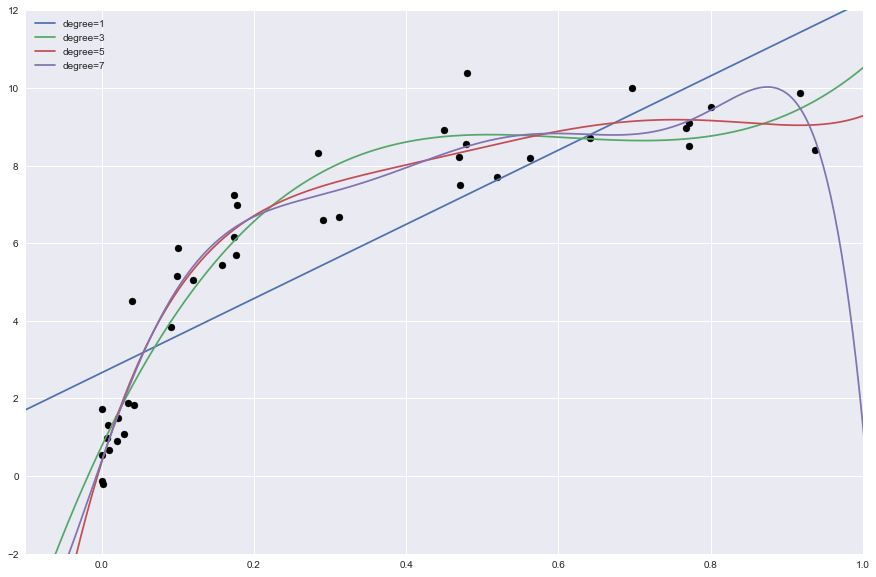

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 15, 10
import seaborn; seaborn.set()  # plot formatting 
X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black') 
axis = plt.axis()

for degree in [1, 3, 5, 7]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
    
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

# from sklearn.learning_curve import validation_curve

In [126]:
from sklearn.learning_curve import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(
    PolynomialRegression(), 
    X, y,
    'polynomialfeatures__degree', degree, 
    cv=7
)

/anaconda3/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


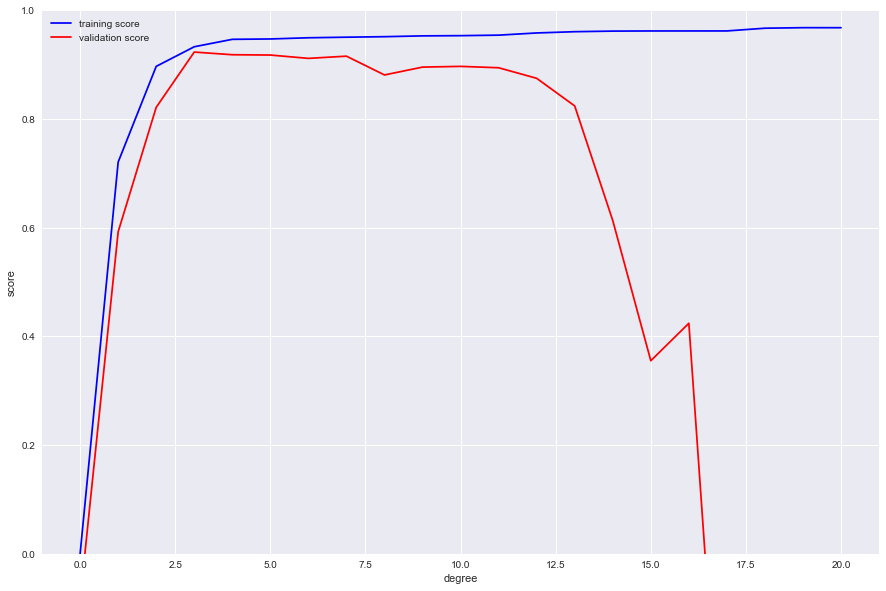

In [127]:
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

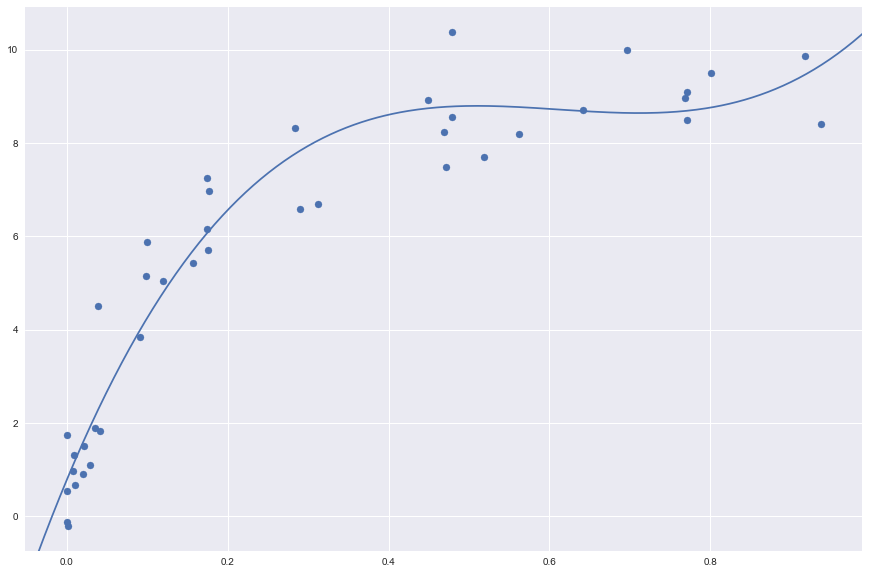

In [128]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# Learning Curves

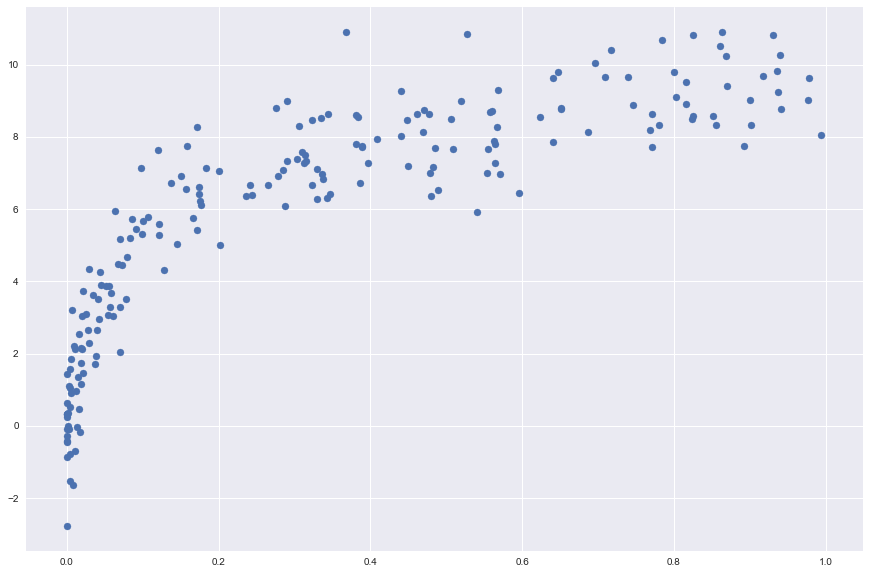

In [146]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

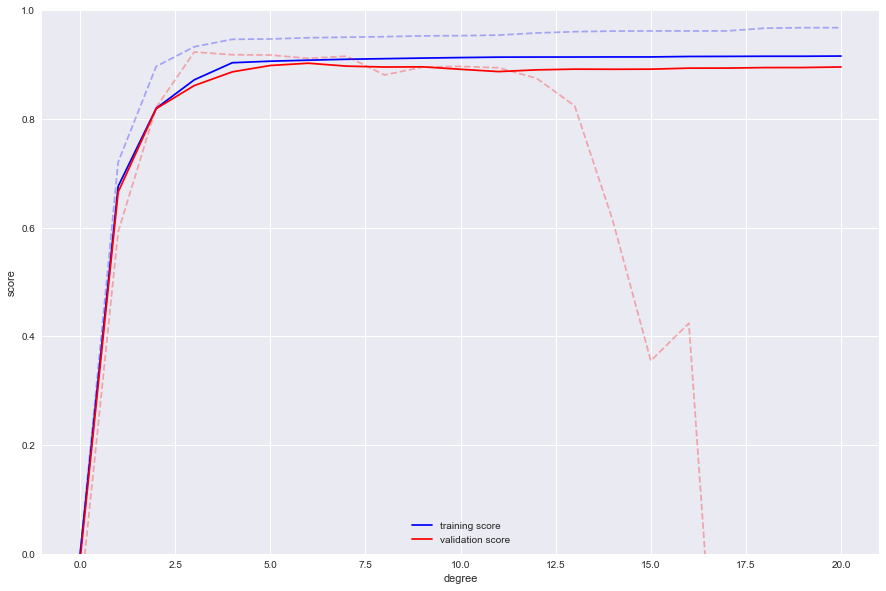

In [147]:
degree = np.arange(21)
train_score2, val_score2 = validation_curve(
    PolynomialRegression(), 
    X2, y2, 
    'polynomialfeatures__degree',
    degree, 
    cv=7
)
plt.plot(degree, np.median(train_score2, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3, linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3, linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

* overfit: training score will be relatively high, while the validation score will be relatively low.
* underfit: this means that the training score will decrease, but the validation score will increase.
* A model will never, give a better score to the validation set than the training set.

Если кривые сошлись - для улучшения скора нужна другая модель или другие данные. В смысле что добавление точек не даст прироста

## Learning curves in Scikit-Learn

In [155]:
# learning_curve - перебирает разные размеры train/test

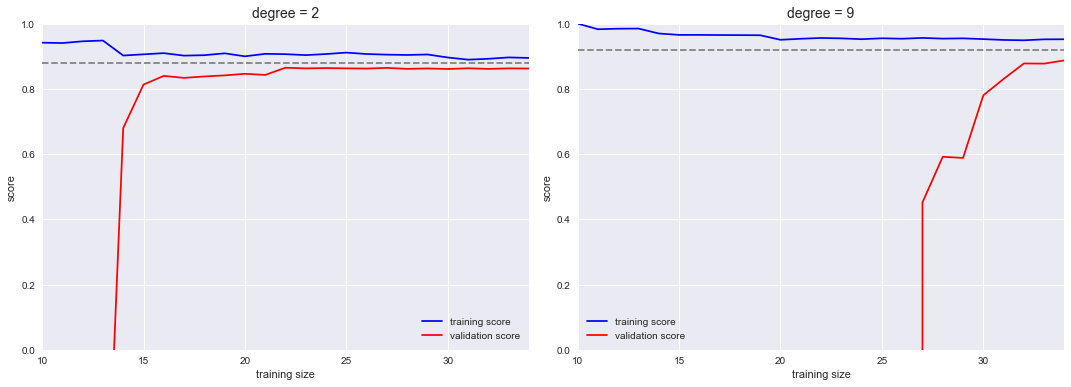

In [154]:
from sklearn.learning_curve import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(
        PolynomialRegression(degree),
        X, y, cv=7,
        train_sizes=np.linspace(0.3, 1, 25)
    )
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

вообщем тут ни чего интересного

## Validation in Practice: Grid Search

In [158]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'polynomialfeatures__degree': np.arange(21),
    'linearregression__fit_intercept': [True, False],
    'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [159]:
grid.fit(X, y)

GridSearchCV(cv=7, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'linearregression__fit_intercept': [True, False], 'linearregression__normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [160]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

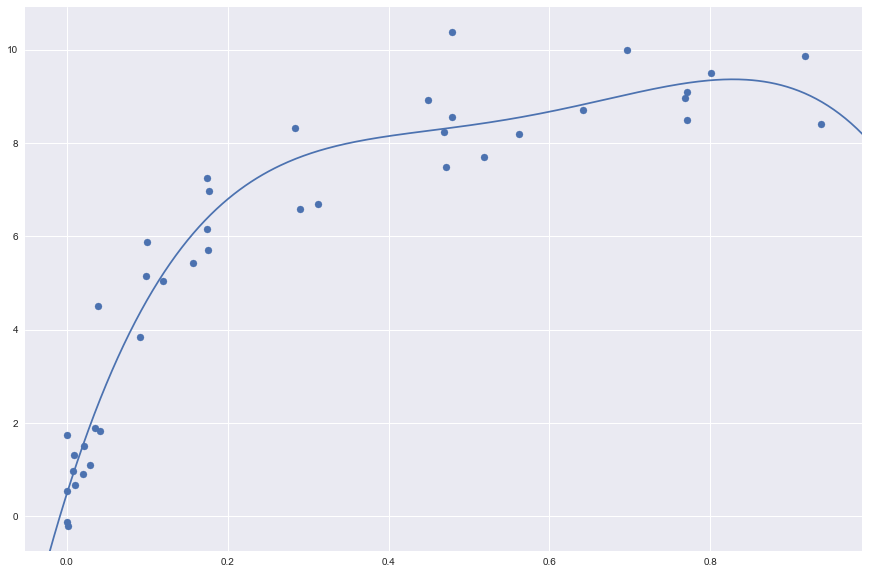

In [162]:
model = grid.best_estimator_
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);